In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy, scipy.io

In [3]:
#matfile=scipy.io.loadmat('test_8AFC_Contrast_Binocular_ManualResp_VisualFieldTest_v2_07232019_133452.mat')
#matfile=scipy.io.loadmat('test_4AFC_Contrast_Binocular_ManualResp_VisualFieldTest_v2_07252019_172206.mat')
#matfile=scipy.io.loadmat('test_4AFC_Contrast_Binocular_SaccadeResp_VisualFieldTest_v2_07252019_181102.mat')
##matfile=scipy.io.loadmat('test_4AFC_Contrast_Binocular_ManualResp_VisualFieldTest_v2_07312019_142047.mat')
matfile=scipy.io.loadmat('test_4AFC_Contrast_Binocular_ManualResp_VisualFieldTest_v2_07312019_150646.mat')

In [4]:
matfile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'AcuityThresLogSF', 'AcuityThresSF', 'AcuityThresSFStored', 'ECC_Index', 'EccentricityConds', 'EccentricitycondNo', 'EffectiveStimulusSizePix', 'EyeTested', 'MagnificationFactorDegree', 'ResponseType', 'Results', 'Results2', 'SizeDegree', 'StimulusDurationNoSaccade', 'THETA_Index', 'TestSF', 'ThetaConds', 'ThetacondNo', 'ThresholdSizedegree', 'absoluteSaccMin', 'acuityOrContrast', 'adjustedSF', 'allPositions', 'allSaccStore', 'ans', 'answer', 'answerSF', 'blockLabels', 'breakFrequency', 'buttons', 'calibAreaDeg', 'calibAreaPx', 'calibProp', 'calibTargSizePerc', 'centerX', 'centerY', 'choice', 'clampAcuityEstimate', 'clampSFsInContrastBlock', 'correctAnswer', 'dataFile', 'def', 'destRect', 'dlg_title', 'eccentricityDeg', 'eccentricityPx', 'evt', 'evtSacc', 'evtype', 'exitExp', 'experimentDuration', 'eye', 'eyeLabels', 'eyePos', 'eyeShown', 'eyeTestedBuffer', 'eyeTracking', 'None', 'fixCheck', 'fixCol', 'fixDuration', 'fixationSizes'

In [5]:
contrast_levels=matfile['pFunc'][0][0] [0][0][1][0][:-1]
contrast_corr=matfile['pFunc'][0][0][0][0][0][0]

[]

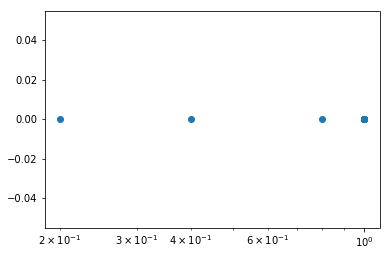

In [6]:
plt.plot( contrast_levels,contrast_corr, 'o')
plt.semilogx()

IndexError: index 1 is out of bounds for axis 0 with size 1

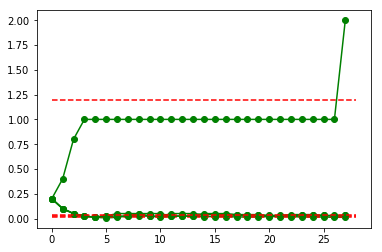

In [7]:
all_thresholds=np.zeros( (3,4))

for which_ecc in [0,1,2]:
    for which_angle in range(4):

        plot( matfile['pFunc'][which_ecc][which_angle] [0][0][1][0], 'go-' )
        #plot( matfile['pFunc'][1][2] [0][0][1][0], 'ro-' )
        #plot( matfile['pFunc'][2][2] [0][0][1][0], 'bo-' )

        running_thresh=matfile['pFunc'][which_ecc][which_angle] [0][0][1][0]

        thresh_guess=np.mean( running_thresh[-5:] )

        plt.plot( [0,28], [thresh_guess, thresh_guess], 'r--' )
        
        all_thresholds[which_ecc,which_angle]=thresh_guess

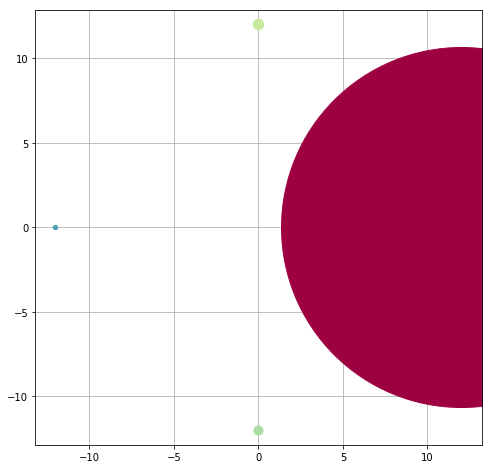

In [8]:
cm=matplotlib.cm.Spectral_r

#eccs=[4.4,8.7,17.4]
eccs=[12]

plt.figure(figsize=(8,8))
for which_ecc in [0]:
    for which_angle_idx in range(4):
        which_angle=-np.pi/2. * which_angle_idx
        radius=eccs[which_ecc]
        this_thresh=all_thresholds[which_ecc,which_angle_idx]
        plt.plot( radius * cos(which_angle), radius * sin(which_angle), 'go', ms=this_thresh*300, color=cm(this_thresh*10.0) )
plt.axis("equal")        
plt.grid()

In [ ]:
all_thresholds

In [ ]:
plt.hist( all_thresholds.flatten() )
print( np.min( all_thresholds))
print( np.max( all_thresholds))

In [ ]:
matfile=scipy.io.loadmat('test_8AFC_Contrast_Binocular_SaccadeResp_VisualFieldTest_v2_07102019_171119.mat')

In [ ]:
contrast_levels=matfile['pFunc'][0][0] [0][0][1][0][:-1]
contrast_corr=matfile['pFunc'][0][0][0][0][0][0]

In [ ]:
all_thresholds=np.zeros( (3,8))

for which_ecc in [0,1,2]:
    for which_angle in range(8):

        plot( matfile['pFunc'][which_ecc][which_angle] [0][0][1][0], 'go-' )
        #plot( matfile['pFunc'][1][2] [0][0][1][0], 'ro-' )
        #plot( matfile['pFunc'][2][2] [0][0][1][0], 'bo-' )

        running_thresh=matfile['pFunc'][which_ecc][which_angle] [0][0][1][0]

        thresh_guess=np.mean( running_thresh[-5:] )

        plt.plot( [0,28], [thresh_guess, thresh_guess], 'r--' )
        
        all_thresholds[which_ecc,which_angle]=thresh_guess

In [ ]:
cm=matplotlib.cm.Spectral_r

eccs=[4.4,8.7,17.4]

plt.figure(figsize=(8,8))
for which_ecc in [0,1,2]:
    for which_angle_idx in range(8):
        which_angle=np.pi/4. * which_angle_idx
        radius=eccs[which_ecc]
        this_thresh=all_thresholds[which_ecc,which_angle_idx]
        plt.plot( radius * cos(which_angle), radius * sin(which_angle), 'go', ms=this_thresh*1000, color=cm(this_thresh*10.0) )
plt.axis("equal")        
plt.grid()